<a href="https://colab.research.google.com/github/Adarsh-Saurabh/AI-Champ-/blob/main/Gradient_Descent_Linear_Regression_KNN_Sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Easy Partial differentiation with sympy

In [ ]:
from sympy import symbols, diff

In [ ]:
x, y, z, m, c = symbols('x y z m c', real=True)

In [ ]:
f = (y - (m*x + c)) ** 2
print(diff(f, m))
print(diff(f, c))

-2*x*(-c - m*x + y)
2*c + 2*m*x - 2*y


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

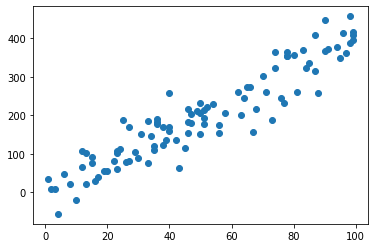

In [ ]:
m = 4
c = np.random.randn(100) * 40
x = np.random.randint(0, 100, size=(100))
y = m * x + c


plt.scatter(x, y)

In [ ]:
# Gradient descent for linear regression

n = y.shape[0]
epochs = 100
search_m = 0
search_c = 0
learning_rate = 1e-5

def cost_function(y, y_hat):
  return np.square(y - y_hat).mean()

def hypothesis(m, c, x):
  return m*x + c

for i in range(epochs):

  y_hat = hypothesis(search_m, search_c, x)

  cost = cost_function(y, y_hat)

  diff_cost_wrt_m = (-2/n) * (np.sum(x * (y - y_hat)))
  diff_cost_wrt_c = (-2/n) * (np.sum(y-y_hat))

  search_m = search_m - learning_rate * diff_cost_wrt_m
  search_c= search_c - learning_rate * diff_cost_wrt_c

  print(f"Epoch: {i+1}\nCost: {cost}\nm: {search_m}\nc: {search_c}\n", "-"*70)


Epoch: 1
Cost: 53755.47895328076
m: 0.26243424947790817
c: 0.003968050725436668
 ----------------------------------------------------------------------
Epoch: 2
Cost: 47095.0337618626
m: 0.5074736239877451
c: 0.007672328155983427
 ----------------------------------------------------------------------
Epoch: 3
Cost: 41288.272873880785
m: 0.7362711051853519
c: 0.01113031593747409
 ----------------------------------------------------------------------
Epoch: 4
Cost: 36225.77764382042
m: 0.9499032518318251
c: 0.014358338850101767
 ----------------------------------------------------------------------
Epoch: 5
Cost: 31812.153861122428
m: 1.149375265319766
c: 0.017371639621320815
 ----------------------------------------------------------------------
Epoch: 6
Cost: 27964.23420667612
m: 1.3356257194420784
c: 0.020184450647371757
 ----------------------------------------------------------------------
Epoch: 7
Cost: 24609.5111045236
m: 1.5095309766582763
c: 0.02281006096090008
 ----------------

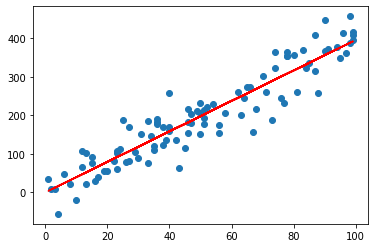

In [ ]:
y_hat = search_m * x + search_c

plt.scatter(x, y)
plt.plot(x, y_hat, color='r')

## KNN

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, confusion_matrix
from scipy.stats import mode

In [ ]:
iris = load_iris()
 
X = iris.data
y = iris.target

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
def eucledian(p1,p2):
    dist = np.sqrt(np.sum((p1-p2)**2))
    return dist

In [ ]:
y_hat = []
k = 5
     
for item in X: 
    point_dist = []
      
    for j in range(len(X)): 
        distances = eucledian(np.array(X[j,:]), item) 
        point_dist.append(distances) 

    point_dist = np.array(point_dist) 
      
    dist = np.argsort(point_dist)[:k] 
      
    labels = y[dist]
      
    lab = mode(labels) 
    lab = lab.mode[0]
    y_hat.append(lab)

In [ ]:
accuracy_score(y, y_hat)

0.9666666666666667

In [ ]:
confusion_matrix(y, y_hat)

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  2, 48]])

## Using Sklearn

In [ ]:
from sklearn.model_selection import train_test_split

from sklearn.tree import ExtraTreeClassifier, DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
classifier = SVC()
classifier.fit(X_train, y_train) # training
classifier.score(X_test, y_test)

0.9333333333333333

In [ ]:
y_hat = classifier.predict(X_test)

In [ ]:
confusion_matrix(y_test, y_hat)

array([[ 9,  0,  0],
       [ 0, 10,  1],
       [ 0,  1,  9]])